<a href="https://colab.research.google.com/github/LuFernandez/imagaynes/blob/master/Restauracion_imgs/restore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP - Restauración de Imágenes
###Ezequiel Vijande
###Lucero Guadalupe Fernandez

###Imports a utilizar

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

####Cargamos imágenes

In [4]:
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/Restauracion_imgs/pic/lenna.png
clear_output()

####mostramos imagen original y definimos funciones a utilizar

In [113]:
#definimos la funcion del filtro: recibe el tamaño del kernel,
#y la imagen sobre la que se aplica el filtro, se usa filtro promediador
def ApplyBlur(img, k_size=3): #lowpass
  kernel = np.full((k_size, k_size), 1)/(k_size**2)
  #kernel = ExpandKernel(kernel, img.shape)
  #G = np.fft.fft2(kernel)*np.fft.fft2(img[:,:,0])
  #G = np.fft.fftshift(G)
  #return np.real(np.fft.ifftshift(np.fft.ifft2(G))), kernel
  return cv2.filter2D(img,-1,kernel), kernel

def ApplyNoise(img):
  row,col,ch = img.shape
  mean = 0
  std = 15
  gauss = np.random.normal(mean,std,(row,col,ch))
  gauss = gauss.reshape(row,col,ch)
  noisy = img + gauss.astype(np.int16)
  return noisy.astype(np.int16)

#ploteamos secuencia
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0, vmax=255)

##Inverse Filter

###Blur

In [149]:
def ExpandKernel(kernel, size):
  delta = np.zeros((size[0], size[1]), dtype=float)
  delta[size[0]//2,size[1]//2] = 1
  return cv2.filter2D(delta, -1, kernel)


def ApplyInverseFilter(degraded, kernel_og):

  kernel = ExpandKernel(kernel_og, degraded.shape)
  H = np.fft.rfft2(kernel)
  G = np.fft.rfft2(degraded[:,:,0])
  R = G/H #np.fft.fftshift(G) #falta el 1/H
  restored = np.real((np.fft.irfft2(R))) 
  restored[restored < 0] = 0
  restored[restored > 255] = 255
  return restored

[[  0. 184. 139. ...   0. 151. 205.]
 [121.  40.   0. ... 103.  79.   0.]
 [255.   0.   0. ... 255.   0.   0.]
 ...
 [  0. 255. 205. ...   0. 255. 255.]
 [199.  73.  28. ... 255. 184.   0.]
 [255.   0.   0. ... 255.   0.   0.]]


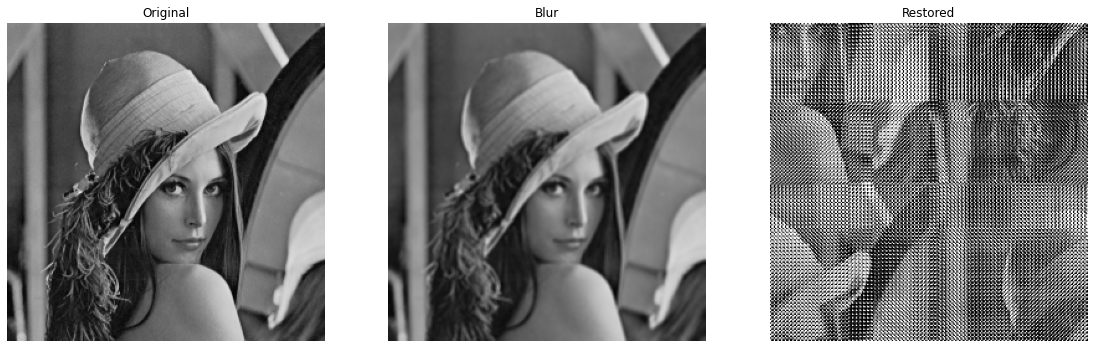

In [150]:
#Original
lenna = cv2.imread('lenna.png')
#
degraded, kernel = ApplyBlur(lenna)
restored = ApplyInverseFilter(degraded, kernel)
print(restored)
fig_a = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)

MakeSubplot(lenna,fig_a,1,3,1,title="Original")
MakeSubplot(degraded,fig_a,1,3,2,title="Blur")
MakeSubplot(restored,fig_a,1,3,3,title="Restored")

In [ ]:
#Original
lenna = cv2.imread('lenna.png')

degraded = ApplyNoise(ApplyBlur(lenna))

fig_a = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)

MakeSubplot(lenna,fig_a,1,3,1,title="Original")
MakeSubplot(degraded,fig_a,1,3,2,title="Blur & Noise")

